In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import os
import os.path

from astropy.io import fits
from time import sleep
from IPython import display
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import FK5
import imageio


from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':"serif"})


In [3]:
from gPhoton import __version__ as V
V

'1.28.4'

In [4]:
c = SkyCoord('00h49m49.296s', '+40d11m13.8306s', frame='icrs')
print(c)
d = SkyCoord.from_name("GJ 3685 a")  
print(d)
e = SkyCoord('00 38 04.34 +39 55 20.0', unit=(u.hourangle, u.deg))
print(e)
f = SkyCoord.from_name("HD 4174")  
print(f)
# 00 38 04.34 +39 55 20.0 

<SkyCoord (ICRS): (ra, dec) in deg
    ( 12.4554,  40.18717517)>
<SkyCoord (ICRS): (ra, dec) in deg
    ( 176.92,  0.254)>
<SkyCoord (ICRS): (ra, dec) in deg
    ( 9.51808333,  39.92222222)>
<SkyCoord (ICRS): (ra, dec) in deg
    ( 11.1549167,  40.6793889)>


In [5]:
'''
Try precessing coordinates to roughly the start date of observations (Oct 2003)
'''
fk5new = FK5(equinox='J2003.85')
newcoords = d.transform_to(fk5new)
print(newcoords)

<SkyCoord (FK5: equinox=J2003.850): (ra, dec) in deg
    ( 176.96933625,  0.23259409)>


In [ ]:
aVar = True
counter = 0

currentTime = str(datetime.datetime.now())
currentTime = currentTime.split(" ")
currentTime = currentTime[1].split(":")
currentTime = str(currentTime[0])+":"+str(currentTime[1])

currentDate = str(datetime.date.today()) + "_" + str(counter)
while(aVar):
    if not os.path.exists(currentDate):
        os.makedirs(currentDate)
        os.makedirs(currentDate + "/ds9_Images")
        os.makedirs(currentDate + "/data")
        aVar = False
    else:
        counter = counter + 1 
        currentDate = str(datetime.date.today()) + "_" + str(counter)
        avar = True

In [154]:
file = "2017-05-03_2/ds9_Images/HD_3765_visitNumber_0.fits" #as an example
hdulist = fits.open(file)

In [155]:
hdulist.info()
hdulist[0].header

Filename: 2017-05-03_2/ds9_Images/HD_3765_visitNumber_0.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      22   (18, 24, 6)   float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   18                                                  
NAXIS2  =                   24                                                  
NAXIS3  =                    6                                                  
EXTEND  =                    T                                                  
CDELT1  = -0.00041666666666666                                                  
CDELT2  = 0.000416666666666667                                                  
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRPIX1  =                  9.5                                                  
CRPIX2  =                 12

In [156]:
c_x = hdulist[0].header['CRPIX1']
c_y = hdulist[0].header['CRPIX2']
rad = 0.01 # deg

c_rad = rad / hdulist[0].header['CDELT2']
c_rad

23.99999999999998

In [31]:
cube = hdulist[0].data
cube.header

AttributeError: 'numpy.ndarray' object has no attribute 'header'

In [9]:
cube.shape

(6, 21, 16)

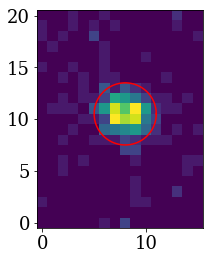

In [42]:
# print (len(cube))
for b in range(0,len(cube)):
    
    plt.imshow(cube[b,:,:], origin='lower')
    x = 3*np.cos(np.arange(0,2*np.pi,.001)) + c_x
    y = 3*np.sin(np.arange(0,2*np.pi,.001)) + c_y
    plt.plot(x,y,c='red')
    plt.show()
    display.clear_output(wait=True)
    sleep(1)



# plt.plot(cube[0,17,:])

In [200]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'ax

In [7]:

file1 = "2017-05-04_0/ds9_Images/HD_3765_visitNumber_" #as an example
file = file1 + "0.fits"
hdulist = fits.open(file)
hdulist.info()
hdulist[0].header
c_x = hdulist[0].header['CRPIX1']
c_y = hdulist[0].header['CRPIX2']
ra = hdulist[0].header['CRVAL1']
dec = hdulist[0].header['CRVAL2']

#with plt.rc_context({'plt.text.color':'red'})
for k in range(0,74):
    w = str(k);
    file = file1 + w + ".fits"
    hdulist = fits.open(file)
    cube = hdulist[0].data
    for b in range(0,len(cube)):
        plt.title("visit# " + w)
        plt.imshow(cube[b,:,:], origin='lower')
        x = 3*np.cos(np.arange(0,2*np.pi,.001)) + c_x
        y = 3*np.sin(np.arange(0,2*np.pi,.001)) + c_y
        plt.plot(x,y,c='red')
        plt.annotate("RA =" + str(ra) + "\n" + "DEC = " + str(dec), xy = (0, 20), size = "xx-small", color = 'r')
        plt.show()
        display.clear_output(wait=True)
        sleep(.01)


KeyboardInterrupt: 

In [123]:
# For ra.
# enter 170.56936 (5 decimal places is OK)
# divide by 15 gives 11.371291
# The "11" is your Hours

# subtract 11 gives 0.371291
# times 60 gives 22.277442
# The "22" is your minutes

# Subtract 22 gives 0.277442
# times 60 gives 16.646...
# The "16.6" is your seconds

# So ra = 11:22:17

# For dec

# Enter 32.65870 (5 decimal places is OK)
# The "32"  is your degrees

# Subtract 32 gives 0.65870
# times 60 gives 39.522
# The "39" is your minutes

# Subtract 39 gives 0.522
# times 60 gives 31.32
# The "31" is your seconds

# So dec = +32:39:31

hours = 



154.38


Filename: 2017-05-04_0/ds9_Images/HD_3765_visitNumber_0.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      22   (18, 24, 6)   float64   


KeyboardInterrupt: 

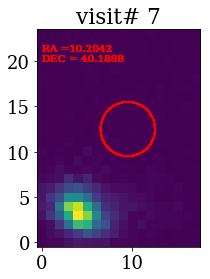

In [12]:
file1 = "2017-05-04_0/ds9_Images/HD_3765_visitNumber_" #as an example
file = file1 + "0.fits"
hdulist = fits.open(file)
hdulist.info()
hdulist[0].header
c_x = hdulist[0].header['CRPIX1']
c_y = hdulist[0].header['CRPIX2']
ra = hdulist[0].header['CRVAL1']
dec = hdulist[0].header['CRVAL2']

k = 0
imageArray = []
while(os.path.exists(file)):
# for k in range(0,74):
    w = str(k);
    k = k + 1
    file = file1 + w + ".fits"
    if( not os.path.exists(file)):
        break
    hdulist = fits.open(file)
    cube = hdulist[0].data
    for b in range(0,len(cube)):
        plt.title("visit# " + w)
        plt.imshow(cube[b,:,:], origin='lower')
        x = 3*np.cos(np.arange(0,2*np.pi,.001)) + c_x
        y = 3*np.sin(np.arange(0,2*np.pi,.001)) + c_y
        plt.plot(x,y,c='red')
        plt.annotate("RA =" + str(ra) + "\n" + "DEC = " + str(dec), xy = (0, 20), size = "xx-small", color = 'r')
        
        name = "2017-06-01_1/ds9_Images/image"+str(b)+"_"+str(k-1)+".png"
        plt.savefig(name)
        imageArray.append(imageio.imread(name))
        
imageio.mimsave("2017-06-01_1/ds9_Images/GIF.gif",imageArray)
        
        
        
        
        
        
#         fig2 = plt.figure()

#         for j in np.arange(0,1000,5):
#             ims.append(plt.plot(expmat2[1],np.absolute(expmat2[2][j]),'r',))


#         im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,blit=True)
#         # To save this second animation with some metadata, use the following command:
#         im_ani.save('gaussian_rectanglebarrier.mp4',dpi=500)

#         plt.show()